# Example 0: Wonderland

*This is more of a teaser than an introductory example for ```Pythas```.*

Years ago I started my very first Haskell Project by implementing [Sanderson's Wonderland](http://pure.iiasa.ac.at/id/eprint/3613/1/WP-92-087.pdf). Now that I've progressed a little, I took this chance to link back to this very start.

One of the biggest obstacles I faced back then, was visualisation and data analysis. Since then, Python has only become more dominant in that field, so why not leverage the power of both languages in their domains?
With ```Pythas``` it is conveniently easy to import a Haskell module and call its functions. No manual data transformations are needed.

So let's see how it works!

## Import Pythas

In order to make use of ```Pythas``` obviously you have to import it first. On import it will first check if you have either ```stack``` or ```ghc``` installed and added to your ```$PATH```. Then it injects its own Importer.

*Note:* If you use ```Pythas``` for the first time, the import might take a little longer. A part of the library is written in Haskell and has to be compiled first.

In [1]:
import pythas

## Import Haskell Modules

Now that ```Pythas``` has setup everything for us, we can start using Haskell code in Python! 

+ What, that was so easy? Yes!

You import the module just as you would import it, if it was written in Python, not much magic to it:

In [2]:
import wonderland.src.wonderland as w

Got File: /home/pinselimo/Python/Pythas-Examples/notebooks/wonderland/src/Wonderland_hasky_ffi.hs
Compiling with: stack


### Wait what? How?

Let's take a look at the Haskell file we are importing. The important parts are:

~~~haskell
module Wonderland where
...
runWonderland :: String -> Int -> [(Double, Double, Double, Double)]
~~~

```Pythas``` parses your module file for all the top level type declarations. It then creates a new module containing appropriate ```foreign export ccall```s and wrapping functions. This module is then compiled into a shared library which can be imported into Python.

On the other side of the river, ```Pythas``` knows about the data representation to expect for each type. So it knows how to convert the function types back and forth too. It will hide all of this implementation details from you though. Let's have a look:

In [3]:
horrorScenario = w.runWonderland("horror",200)

The ```runWonderland``` function takes a string and an integer as arguments. The string specifies which of *Sanderson's* scenarios to run. Our return value should be a list of tuples with four fields.

We can check if that's done correctly:

In [4]:
type(horrorScenario), type(horrorScenario[0])

(list, tuple)

In [5]:
horrorScenario[0]

(1.0, 0.98, 1.0, 1.0)

Brilliant! 

Now why not visualize it?

In [6]:
import matplotlib.pyplot as plt

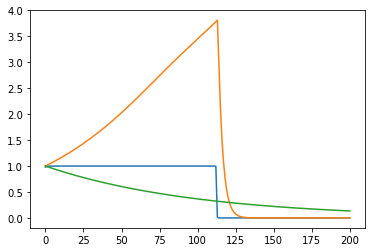

In [7]:
plt.plot([(b,c,d) for a,b,c,d in horrorScenario])

### TADAAA

The world comes to an end after ~110 years. It formally started in 1992, so we got some 80 years to go. Enjoy your life and code some Haskell :)